## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df= pd.merge(mouse_metadata, study_results, how = 'left', on='Mouse ID')

# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = cleaned.set_index('Mouse ID')
cleaned_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# Checking the number of mice in the clean DataFrame.
merged_df["Mouse ID"].nunique()

249

## Summary Statistics

In [8]:
cleaned_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1883.00000,1883.000000,1883.000000,1883.000000,1883.000000
mean,12.77111,25.660648,19.622942,50.449310,1.025491
std,7.18380,3.931950,14.090045,8.914637,1.139284
min,1.00000,15.000000,0.000000,22.050126,0.000000
25%,7.00000,25.000000,5.000000,45.000000,0.000000
50%,13.00000,27.000000,20.000000,48.951368,1.000000
75%,20.00000,29.000000,30.000000,56.346321,2.000000
max,24.00000,30.000000,45.000000,78.567014,4.000000


In [9]:
print(len(cleaned_df["Drug Regimen"].unique()))

10


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugreg_tumorv = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_method1 = drugreg_tumorv.mean()
median_method1 = drugreg_tumorv.median()
variance_method1 = drugreg_tumorv.var()
std_method1 = drugreg_tumorv.std()
sem_method1 = drugreg_tumorv.sem()

stat_sum_method1 = pd.DataFrame({
    'Mean Tumor Volume (mm3)': mean_method1,
    'Median Tumor Volume (mm3)': median_method1,
    'Variance Tumor Volume (mm3)': variance_method1,
    'Std. Dev. Tumor Volume (mm3)': std_method1,
    'Std. Err. Tumor Volume (mm3)': sem_method1
})

stat_sum_method1

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),Std. Err. Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#.agg() from stackoverflow google-fu!
stat_sum_method2 = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_sum_method2a = stat_sum_method2.rename(columns = {'mean': 'Mean Tumor Volume (mm3)',
                                  'median': 'Median Tumor Volume (mm3)',
                                  'var': 'Variance Tumor Volume (mm3)',
                                  'std': 'Std. Dev. Tumor Volume (mm3)',
                                  'sem': 'Std. Err. Tumor Volume (mm3)'
                                  })
stat_sum_method2a

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),Std. Err. Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [102]:
cleaned_reset = cleaned_df.reset_index()
cleaned_reset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


<IPython.core.display.Javascript object>


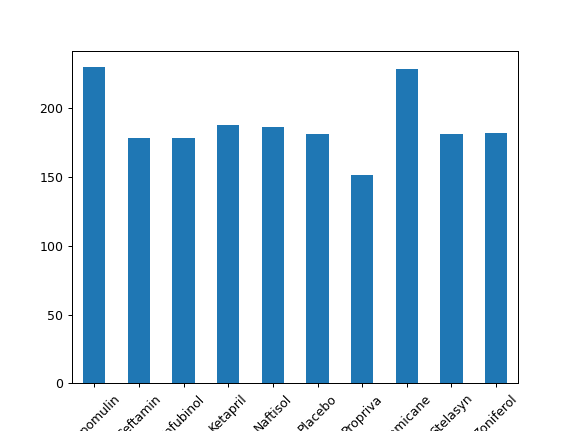

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_per_regimen = cleaned_reset.groupby('Drug Regimen')['Mouse ID'].count()
count_per_regimen.plot.bar(x='Drug Regimen', y='Number of mice', rot=45)


<IPython.core.display.Javascript object>


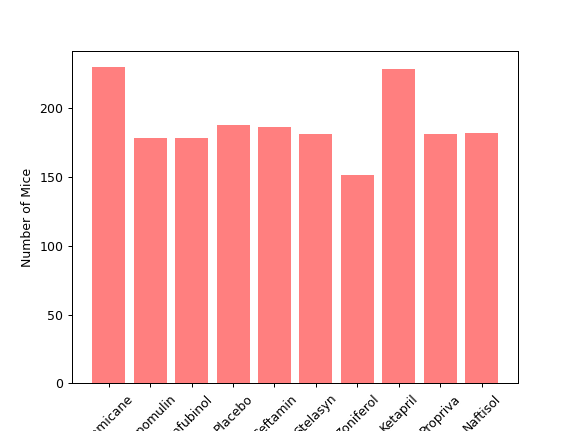

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = cleaned_reset["Drug Regimen"].unique()
x_axis = np.arange(len(drugs))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, drugs, rotation = 45)
total_no_mice = cleaned_reset.groupby('Drug Regimen')['Mouse ID'].count()
plt.bar(x_axis, total_no_mice, color = 'r', alpha = 0.5, align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


<IPython.core.display.Javascript object>


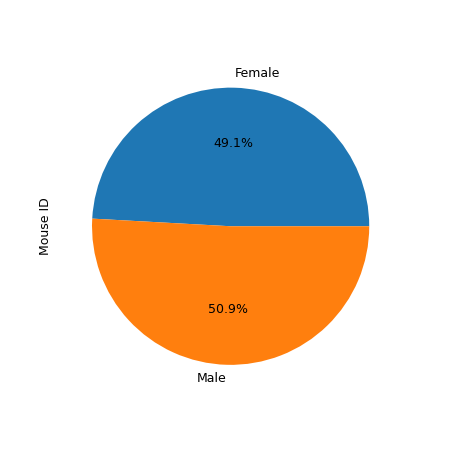

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_by_sex = cleaned_reset.groupby('Sex')['Mouse ID'].count()
count_by_sex.plot.pie(y='sex', figsize=(5,5), autopct='%1.1f%%')

<IPython.core.display.Javascript object>


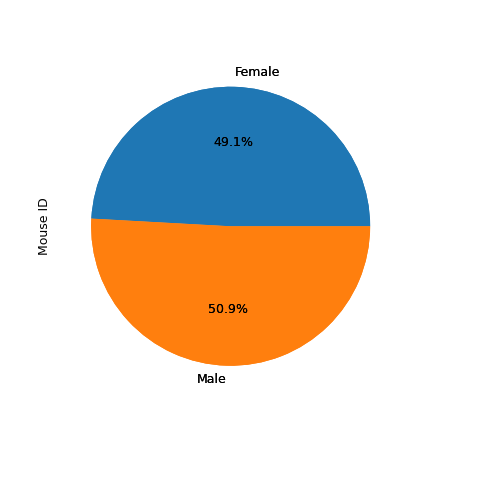

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_by_sex, labels =count_by_sex.index.values, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [108]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') | (cleaned_df['Drug Regimen'] == 'Ramicane') | (cleaned_df['Drug Regimen'] == 'Infubinol') | (cleaned_df['Drug Regimen'] == 'Ceftamin')]
filtered_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z581,Infubinol,Female,24,25,25,54.316407,2
z581,Infubinol,Female,24,25,30,56.286750,2
z581,Infubinol,Female,24,25,35,58.628399,3


In [109]:
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = filtered_df.groupby('Mouse ID')['Timepoint'].max()
final_tumor_vol

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [110]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(filtered_df, final_tumor_vol, how='inner', on=['Mouse ID', 'Timepoint'])
merged_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3
y163,Infubinol,Female,17,27,45,67.685569,3
y769,Ceftamin,Female,6,27,45,68.594745,4


In [121]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drugs_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_interest:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_size = merged_df.loc[merged_df['Drug Regimen'] == drugs_interest, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_size)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_size.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    l_bound = lower_q - (1.5 * iqr)
    u_bound = upper_q + (1.5 * iqr)
    outliers = final_tumor_size.loc[(final_tumor_size < l_bound) | (final_tumor_size > u_bound)]
    print(f'{drugs_interest} potential outliers are {outliers}')

ValueError: Lengths must match to compare

<IPython.core.display.Javascript object>


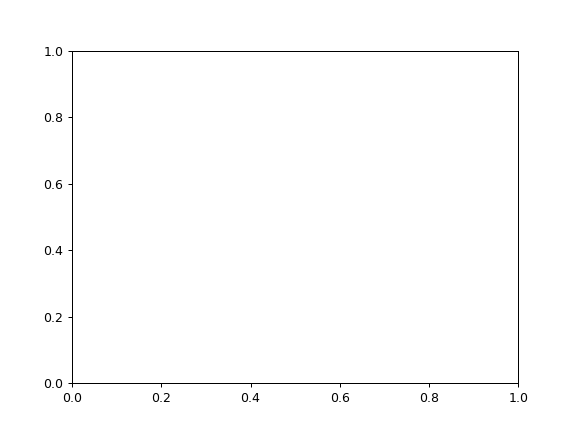

ValueError: Dimensions of labels and X must be compatible

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = merged_df['Tumor Volume (mm3)']
plt.boxplot(tumor_vol, labels = drugs_interest)
plt.ylabel('Final tumor volume (mm3)')
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


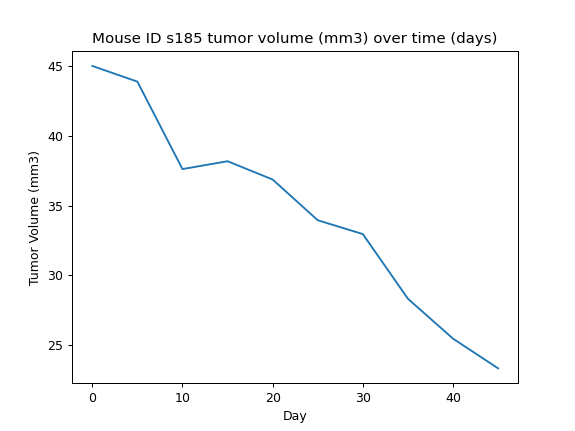

In [131]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin')]
capomulin_df

mouse = 's185'
cap_mouse = cleaned_reset.loc[cleaned_reset['Mouse ID'] == mouse]
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'])
plt.title('Mouse ID s185 tumor volume (mm3) over timepoint (days)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<IPython.core.display.Javascript object>


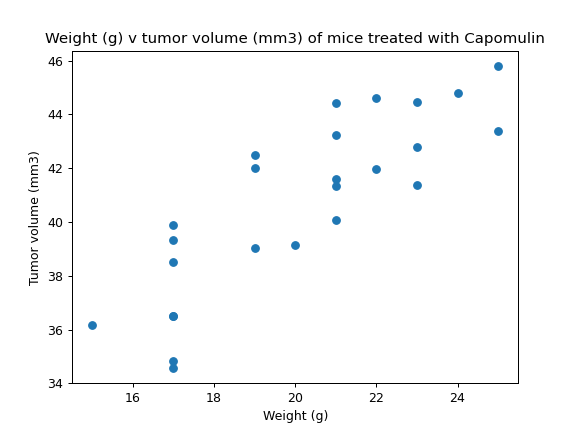

In [134]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_wt = capomulin_df.groupby('Mouse ID').mean()
plt.scatter(mean_wt['Weight (g)'], mean_wt['Tumor Volume (mm3)'])
plt.title('Weight (g) v tumor volume (mm3) of mice treated with Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor volume (mm3)')
plt.show()

## Correlation and Regression

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

sts.pearsonr(mean_wt['Weight (g)'], mean_wt['Tumor Volume (mm3)'])

(0.8419363424694717, 1.322572243471279e-07)